## Feature Engineering and CV based  on 5th Place Solutions

`param = {'objective': 'multi:softprob', 
         'eta': 0.05, 
         'max_depth': 8,
         'silent': 1, 
         'num_class': len(target_cols),
         'eval_metric': 'merror',
         'min_child_weight': 10,
         'min_split_loss': 1,
         'subsample': 0.7,
         'colsample_bytree': 0.7,
         'seed': 0}`
`n_repetition=5, num_rounds=150`

Max MAP@7 of 0.8615988 achieved at iteration 124.

Final MAP@7 of 0.8614664 achieved at iteration 150. 

Private LB: 0.0302492, public LB: 0.0298314

New in this notebook:
- Trained@2015-06-28, validated@2015-12-28
- `min_child_weight=10` is much better than `min_child_weight=1`, try more trees to find the optimal number of iterations
- Overfitting appears to be a concern, consider the following parameters to control overfitting
    - Decrease `max_depth` to reduce complexity
    - Increase `min_child_weight` and `gamma` (alias `min_split_loss`) to control complexity. Prunes the splits where loss < `min_split_loss` (or `gamma`).
    - Decrease `subsample` and `colsample_bytree` to add more randomness
    - Reduce `eta` and increase `num_rounds` 
- Other parameters to reduce overfitting
    - `max_delta_step`: helpful in logistic regression when class is extremely imbalanced. Set it to 1-10.
    - `colsample_bylevel`: Subsample ratio of columns for each split, in each level.
    - `lambda`: L2 regularization
    - `alpha`: L1 regularization
    - `max_leaves`: Maximum number of nodes to be added. Only relevant when `grow_policy=lossguide`

In [1]:
from santander_helper import *

Train, validate, and predict, repetition 0 of 5
[0]	train-merror:0.294225	val-merror:0.350647	train-MAP@7:0	val-MAP@7:0.828217
[1]	train-merror:0.293889	val-merror:0.342952	train-MAP@7:0	val-MAP@7:0.83402
[2]	train-merror:0.291795	val-merror:0.338697	train-MAP@7:0	val-MAP@7:0.839292
[3]	train-merror:0.290002	val-merror:0.338311	train-MAP@7:0	val-MAP@7:0.840289
[4]	train-merror:0.289264	val-merror:0.337149	train-MAP@7:0	val-MAP@7:0.842606
[5]	train-merror:0.288841	val-merror:0.337233	train-MAP@7:0	val-MAP@7:0.842637
[6]	train-merror:0.286711	val-merror:0.334725	train-MAP@7:0	val-MAP@7:0.844487
[7]	train-merror:0.286168	val-merror:0.333524	train-MAP@7:0	val-MAP@7:0.845958
[8]	train-merror:0.285864	val-merror:0.333265	train-MAP@7:0	val-MAP@7:0.846183
[9]	train-merror:0.285199	val-merror:0.332865	train-MAP@7:0	val-MAP@7:0.846726
[10]	train-merror:0.284475	val-merror:0.331955	train-MAP@7:0	val-MAP@7:0.847805
[11]	train-merror:0.283804	val-merror:0.332221	train-MAP@7:0	val-MAP@7:0.84783
[12]

[103]	train-merror:0.262962	val-merror:0.321674	train-MAP@7:0	val-MAP@7:0.861025
[104]	train-merror:0.262727	val-merror:0.321621	train-MAP@7:0	val-MAP@7:0.861088
[105]	train-merror:0.26261	val-merror:0.321713	train-MAP@7:0	val-MAP@7:0.86105
[106]	train-merror:0.262466	val-merror:0.321603	train-MAP@7:0	val-MAP@7:0.861103
[107]	train-merror:0.262213	val-merror:0.321685	train-MAP@7:0	val-MAP@7:0.861035
[108]	train-merror:0.262122	val-merror:0.321666	train-MAP@7:0	val-MAP@7:0.861126
[109]	train-merror:0.262041	val-merror:0.321634	train-MAP@7:0	val-MAP@7:0.861245
[110]	train-merror:0.261838	val-merror:0.321754	train-MAP@7:0	val-MAP@7:0.861106
[111]	train-merror:0.261908	val-merror:0.321772	train-MAP@7:0	val-MAP@7:0.861104
[112]	train-merror:0.261775	val-merror:0.321951	train-MAP@7:0	val-MAP@7:0.860993
[113]	train-merror:0.261645	val-merror:0.321785	train-MAP@7:0	val-MAP@7:0.861083
[114]	train-merror:0.261471	val-merror:0.321756	train-MAP@7:0	val-MAP@7:0.861104
[115]	train-merror:0.261513	va

[54]	train-merror:0.272382	val-merror:0.323398	train-MAP@7:0	val-MAP@7:0.857656
[55]	train-merror:0.271997	val-merror:0.323435	train-MAP@7:0	val-MAP@7:0.857518
[56]	train-merror:0.271804	val-merror:0.323316	train-MAP@7:0	val-MAP@7:0.857625
[57]	train-merror:0.271486	val-merror:0.323158	train-MAP@7:0	val-MAP@7:0.857738
[58]	train-merror:0.271447	val-merror:0.32298	train-MAP@7:0	val-MAP@7:0.857974
[59]	train-merror:0.27109	val-merror:0.322964	train-MAP@7:0	val-MAP@7:0.858097
[60]	train-merror:0.270951	val-merror:0.322888	train-MAP@7:0	val-MAP@7:0.858219
[61]	train-merror:0.27062	val-merror:0.322888	train-MAP@7:0	val-MAP@7:0.858332
[62]	train-merror:0.270221	val-merror:0.322961	train-MAP@7:0	val-MAP@7:0.858373
[63]	train-merror:0.269976	val-merror:0.32311	train-MAP@7:0	val-MAP@7:0.858341
[64]	train-merror:0.269692	val-merror:0.323476	train-MAP@7:0	val-MAP@7:0.858233
[65]	train-merror:0.26945	val-merror:0.323384	train-MAP@7:0	val-MAP@7:0.858333
[66]	train-merror:0.269361	val-merror:0.32312

[5]	train-merror:0.289025	val-merror:0.336129	train-MAP@7:0	val-MAP@7:0.842562
[6]	train-merror:0.289088	val-merror:0.335798	train-MAP@7:0	val-MAP@7:0.844028
[7]	train-merror:0.287727	val-merror:0.334853	train-MAP@7:0	val-MAP@7:0.844396
[8]	train-merror:0.28737	val-merror:0.334298	train-MAP@7:0	val-MAP@7:0.844825
[9]	train-merror:0.286042	val-merror:0.333909	train-MAP@7:0	val-MAP@7:0.845264
[10]	train-merror:0.285938	val-merror:0.332853	train-MAP@7:0	val-MAP@7:0.846384
[11]	train-merror:0.285088	val-merror:0.331665	train-MAP@7:0	val-MAP@7:0.84786
[12]	train-merror:0.284288	val-merror:0.331424	train-MAP@7:0	val-MAP@7:0.848872
[13]	train-merror:0.283754	val-merror:0.330838	train-MAP@7:0	val-MAP@7:0.849547
[14]	train-merror:0.283361	val-merror:0.330232	train-MAP@7:0	val-MAP@7:0.849936
[15]	train-merror:0.282815	val-merror:0.329392	train-MAP@7:0	val-MAP@7:0.850841
[16]	train-merror:0.282379	val-merror:0.329451	train-MAP@7:0	val-MAP@7:0.851139
[17]	train-merror:0.281971	val-merror:0.328971	

[108]	train-merror:0.262448	val-merror:0.32171	train-MAP@7:0	val-MAP@7:0.861467
[109]	train-merror:0.262297	val-merror:0.321856	train-MAP@7:0	val-MAP@7:0.86138
[110]	train-merror:0.262015	val-merror:0.321894	train-MAP@7:0	val-MAP@7:0.861241
[111]	train-merror:0.261983	val-merror:0.322002	train-MAP@7:0	val-MAP@7:0.861208
[112]	train-merror:0.261824	val-merror:0.322064	train-MAP@7:0	val-MAP@7:0.861241
[113]	train-merror:0.261691	val-merror:0.321919	train-MAP@7:0	val-MAP@7:0.861345
[114]	train-merror:0.261498	val-merror:0.321859	train-MAP@7:0	val-MAP@7:0.861362
[115]	train-merror:0.261363	val-merror:0.321894	train-MAP@7:0	val-MAP@7:0.861345
[116]	train-merror:0.261154	val-merror:0.321717	train-MAP@7:0	val-MAP@7:0.861516
[117]	train-merror:0.260966	val-merror:0.321634	train-MAP@7:0	val-MAP@7:0.86154
[118]	train-merror:0.260977	val-merror:0.321551	train-MAP@7:0	val-MAP@7:0.861515
[119]	train-merror:0.260802	val-merror:0.321465	train-MAP@7:0	val-MAP@7:0.861555
[120]	train-merror:0.260671	val

[59]	train-merror:0.270945	val-merror:0.323724	train-MAP@7:0	val-MAP@7:0.857235
[60]	train-merror:0.270572	val-merror:0.323945	train-MAP@7:0	val-MAP@7:0.857131
[61]	train-merror:0.270603	val-merror:0.323854	train-MAP@7:0	val-MAP@7:0.85733
[62]	train-merror:0.270367	val-merror:0.323905	train-MAP@7:0	val-MAP@7:0.857396
[63]	train-merror:0.270184	val-merror:0.32397	train-MAP@7:0	val-MAP@7:0.857437
[64]	train-merror:0.27021	val-merror:0.323976	train-MAP@7:0	val-MAP@7:0.857471
[65]	train-merror:0.270002	val-merror:0.323825	train-MAP@7:0	val-MAP@7:0.857645
[66]	train-merror:0.269723	val-merror:0.323778	train-MAP@7:0	val-MAP@7:0.857785
[67]	train-merror:0.269309	val-merror:0.323785	train-MAP@7:0	val-MAP@7:0.857832
[68]	train-merror:0.269124	val-merror:0.323474	train-MAP@7:0	val-MAP@7:0.858121
[69]	train-merror:0.268858	val-merror:0.323455	train-MAP@7:0	val-MAP@7:0.85819
[70]	train-merror:0.268946	val-merror:0.323253	train-MAP@7:0	val-MAP@7:0.858446
[71]	train-merror:0.268451	val-merror:0.3233

[10]	train-merror:0.28397	val-merror:0.329209	train-MAP@7:0	val-MAP@7:0.850706
[11]	train-merror:0.28389	val-merror:0.328993	train-MAP@7:0	val-MAP@7:0.851016
[12]	train-merror:0.283427	val-merror:0.328908	train-MAP@7:0	val-MAP@7:0.851189
[13]	train-merror:0.283316	val-merror:0.329051	train-MAP@7:0	val-MAP@7:0.851348
[14]	train-merror:0.283372	val-merror:0.327935	train-MAP@7:0	val-MAP@7:0.851437
[15]	train-merror:0.28257	val-merror:0.328043	train-MAP@7:0	val-MAP@7:0.851712
[16]	train-merror:0.282499	val-merror:0.327755	train-MAP@7:0	val-MAP@7:0.852215
[17]	train-merror:0.282141	val-merror:0.327715	train-MAP@7:0	val-MAP@7:0.852066
[18]	train-merror:0.281718	val-merror:0.327862	train-MAP@7:0	val-MAP@7:0.852299
[19]	train-merror:0.281688	val-merror:0.327583	train-MAP@7:0	val-MAP@7:0.8527
[20]	train-merror:0.281245	val-merror:0.327037	train-MAP@7:0	val-MAP@7:0.852988
[21]	train-merror:0.280973	val-merror:0.326939	train-MAP@7:0	val-MAP@7:0.853482
[22]	train-merror:0.280275	val-merror:0.32676

[113]	train-merror:0.261204	val-merror:0.321056	train-MAP@7:0	val-MAP@7:0.861927
[114]	train-merror:0.261172	val-merror:0.32098	train-MAP@7:0	val-MAP@7:0.861973
[115]	train-merror:0.260955	val-merror:0.32093	train-MAP@7:0	val-MAP@7:0.862033
[116]	train-merror:0.260757	val-merror:0.320755	train-MAP@7:0	val-MAP@7:0.862161
[117]	train-merror:0.260484	val-merror:0.320882	train-MAP@7:0	val-MAP@7:0.862072
[118]	train-merror:0.260363	val-merror:0.320788	train-MAP@7:0	val-MAP@7:0.862132
[119]	train-merror:0.260207	val-merror:0.321079	train-MAP@7:0	val-MAP@7:0.861934
[120]	train-merror:0.260233	val-merror:0.321067	train-MAP@7:0	val-MAP@7:0.862007
[121]	train-merror:0.260006	val-merror:0.321031	train-MAP@7:0	val-MAP@7:0.862021
[122]	train-merror:0.259733	val-merror:0.320999	train-MAP@7:0	val-MAP@7:0.862029
[123]	train-merror:0.259529	val-merror:0.321046	train-MAP@7:0	val-MAP@7:0.862009
[124]	train-merror:0.259373	val-merror:0.320802	train-MAP@7:0	val-MAP@7:0.862074
[125]	train-merror:0.259152	va

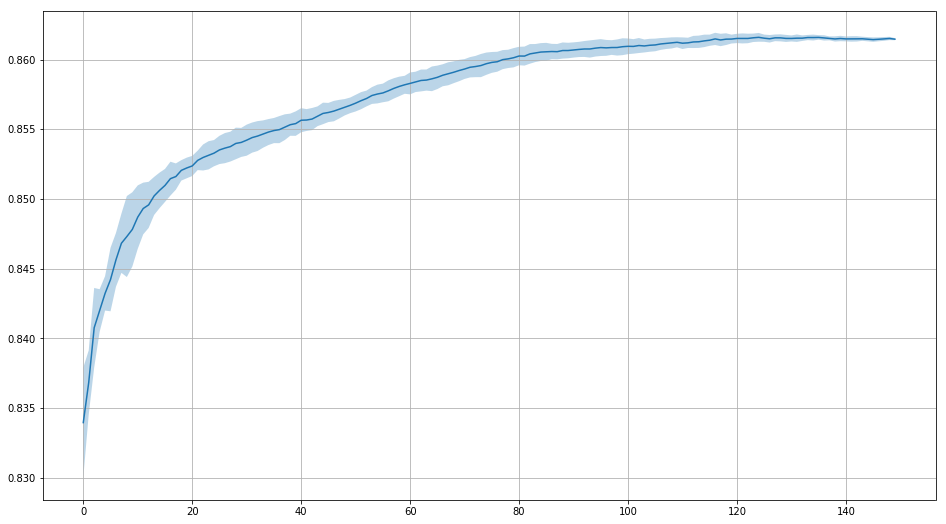

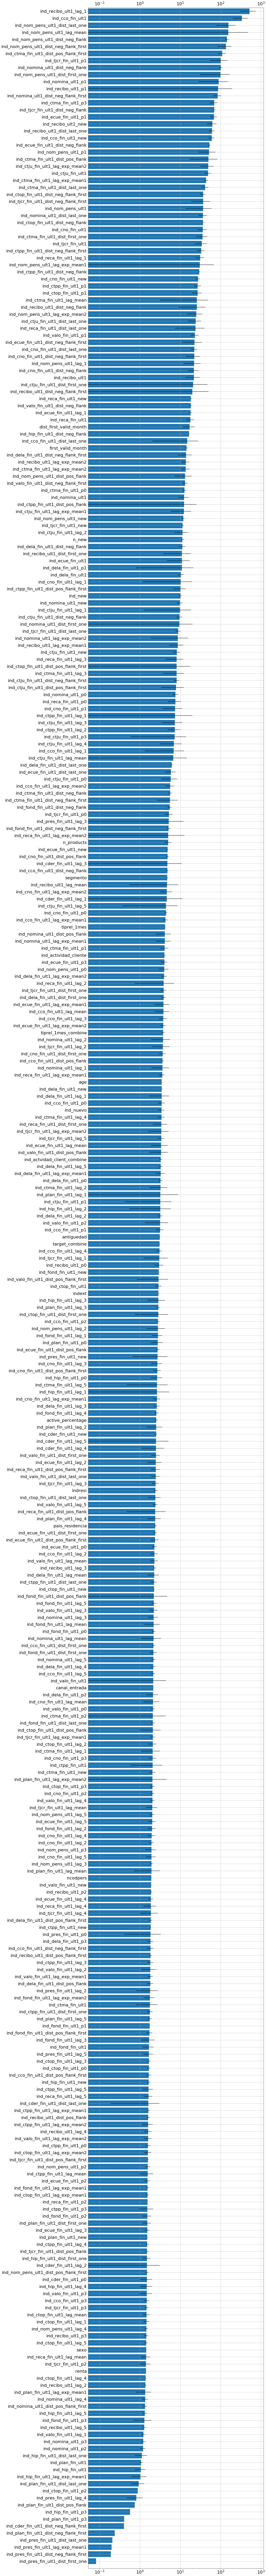

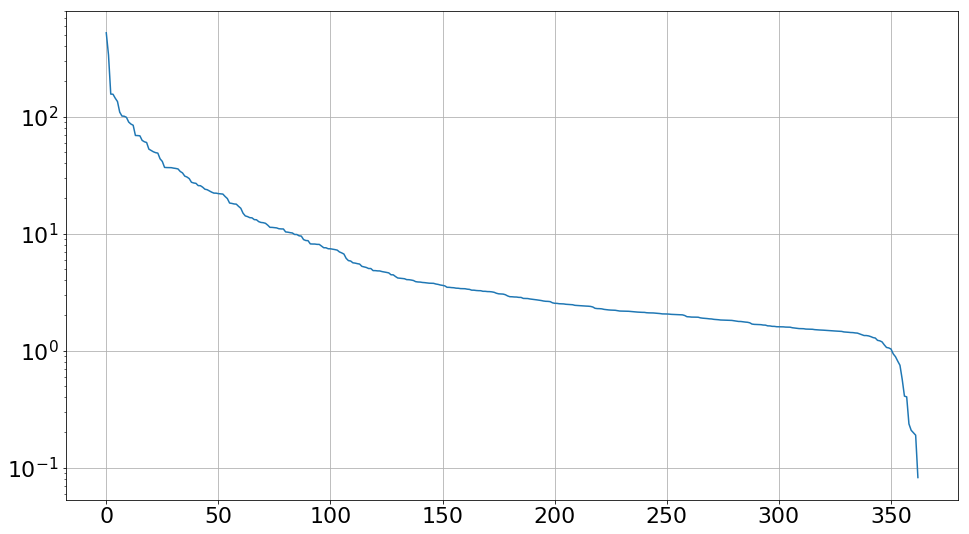

In [2]:
# Train, validation, and prediction
simulation_name = 'p4'
param = {'objective': 'multi:softprob', 
         'eta': 0.05, 
         'max_depth': 8,
         'silent': 1, 
         'num_class': len(target_cols),
         'eval_metric': 'merror',
         'min_child_weight': 10,
         # 'min_split_loss': 1,
         'lambda': 5,
         'subsample': 0.7,
         'colsample_bytree': 0.7,
         'seed': 0}
num_rounds = 150
n_repeat = 5

history, model_dict, y_pred, y_sub = \
    train_test_month(param, num_rounds, '2015-06-28', '2016-05-28', 
    sub_name='eda_4_32_{}.csv.gz'.format(simulation_name), 
    n_repeat=n_repeat, random_seed=54, 
    n_features=None, eval_train_flag=False)

# History and learning curve
history_train = history.xs(axis=1, level=[1, 2], key=['train', 'MAP@7']).copy()
history_train['mean'] = history_train.iloc[:, :n_repeat].mean(axis=1)
history_train['std'] = history_train.iloc[:, :n_repeat].std(axis=1)

history_val = history.xs(axis=1, level=[1, 2], key=['val', 'MAP@7']).copy()
history_val['mean'] = history_val.iloc[:, :n_repeat].mean(axis=1)
history_val['std'] = history_val.iloc[:, :n_repeat].std(axis=1)

plt.figure(figsize=(16, 9))
# plt.plot(history_train['mean'])
# plt.fill_between(history_train.index, history_train['mean']+history_train['std'], history_train['mean']-history_train['std'], alpha=0.3)

plt.plot(history_val['mean'])
plt.fill_between(history_val.index, history_val['mean']+history_val['std'], history_val['mean']-history_val['std'], alpha=0.3)

plt.grid()

# Feature importance
fi = pd.DataFrame({i: model_dict[i].get_score(importance_type='gain') for i in range(n_repeat)})
fi['mean'] = fi.iloc[:, :n_repeat].mean(axis=1)
fi['std'] = fi.iloc[:, :n_repeat].std(axis=1)
fi.sort_values(by=['mean'], inplace=True, ascending=False)
# fi.reset_index(inplace=True)
#fi.to_csv('feature_importance_{}.csv'.format(simulation_name))

plt.rcParams.update({'figure.figsize': '16, 240'})
plt.rcParams.update({'font.size': '22'})
fig, ax = plt.subplots()
ax.barh(fi.index, fi['mean'].values, log=True, xerr=fi['std'].values)
ax.grid()
ax.tick_params(labelbottom=True,labeltop=True)
ax.set_ylim(fi.shape[0], -0.5)

plt.figure(figsize=(16, 9))
plt.plot(fi.values[:, n_repeat])
plt.grid()
plt.yscale('log')

# Save data
save_pickle('parameter_tune_eda_4_32_{}.pickle'.format(simulation_name), (history, model_dict, y_pred, y_sub, fi, param))

In [3]:
history_val

repetition,0,1,2,3,4,mean,std
0,0.828217,0.838260,0.834795,0.832059,0.836490,0.833964,0.003943
1,0.834020,0.839503,0.838478,0.837211,0.835017,0.836846,0.002302
2,0.839292,0.845668,0.840830,0.839416,0.838620,0.840765,0.002856
3,0.840289,0.844247,0.840893,0.842257,0.842323,0.842002,0.001531
4,0.842606,0.844386,0.841835,0.842658,0.844671,0.843231,0.001232
5,0.842637,0.848020,0.842562,0.843281,0.844626,0.844225,0.002277
6,0.844487,0.848467,0.844028,0.844391,0.846819,0.845638,0.001928
7,0.845958,0.849657,0.844396,0.845788,0.848341,0.846828,0.002124
8,0.846183,0.851439,0.844825,0.844916,0.849188,0.847310,0.002905
9,0.846726,0.851245,0.845264,0.845818,0.850041,0.847819,0.002665


In [4]:
print('Max MAP@7 of {:.7f} achieved at iteration {}.'.format(history_val['mean'].max(), history_val['mean'].idxmax()))
print('Final MAP@7 of {:.7f} achieved at iteration {}.'.format(history_val['mean'].iloc[-1], num_rounds))

Max MAP@7 of 0.8615988 achieved at iteration 124.
Final MAP@7 of 0.8614664 achieved at iteration 150.
